## 출력층 설계하기
신경망을 분류와 회귀 모두에 이용할 수 있다. 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다.

<사용하는 일반적인 예시>
- 회귀 : 항등 함수
- 분류 : 소프트맥스 함수

### 항등 함수
항등 함수는 입력을 그대로 출력한다. 즉, 입력과 출력이 항상 같다는 뜻의 항등이다.

그래서 출력층에서 항등 함수를 사용하면 입력 신호가 그대로 출력 신호가 된다.

### 소프트맥스 함수
$$
y_k = \frac{\exp(a_k)}{\sum_{i=1}^{n} \exp(a_i)}
$$

- exp(x) : e^x를 뜻하는 지수 함수이다. (e는 자연 상수)
- n : 출력층의 뉴런 수
- yk : 그 중 k번째를 출력하겠다는 뜻

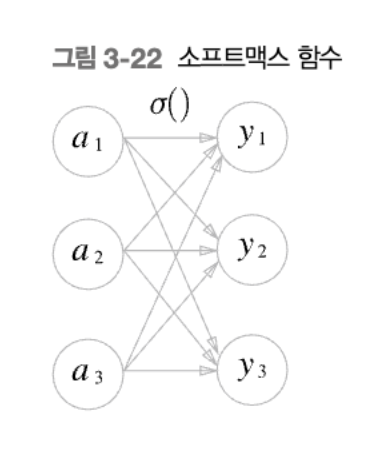

In [1]:
# Softmax 구현
import numpy as np

a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수 함수
print("exp_a : ", exp_a)

sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print("sum_exp_a : ", sum_exp_a)

y = exp_a / sum_exp_a
print(y)

exp_a :  [ 1.34985881 18.17414537 54.59815003]
sum_exp_a :  74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [3]:
# 위 구현을 좀 더 단순화
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

answer = softmax(a)
print(answer)

[0.01821127 0.24519181 0.73659691]


## 소프트맥스 함수 구현 시 주의점

소프트맥스 함수는 지수 함수를 사용하는데, 지수 함수란 것이 쉽게 아주 큰 값을 내뱉기에 오버플로 문제가 존재한다.

따라서 아래와 같은 로직을 통해 이를 막을 수 있다.

In [4]:
def softmax(a):
    c = np.max(a) # 최대 값
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

answer = softmax(a)
print(answer)

[0.01821127 0.24519181 0.73659691]


## 소프트맥스 함수의 특징

아래 구현코드에서 보는 바와 같이 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수이다.

또, 소프트맥스 함수 출력의 총합은 1이다.

In [5]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

sum_y = np.sum(y)
print(sum_y)

[0.01821127 0.24519181 0.73659691]
1.0
